In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split

# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score

#Importing the KNN from scikit-learn library
from sklearn.neighbors import KNeighborsClassifier
 
#Importing the Decision Tree from scikit-learn library
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

filepath = '/Users/apple/Documents/Kaggle/churn/Churn_Modelling.csv'
df = pd.read_csv(filepath)



In [2]:
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
cols = df.columns
cols

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# removing outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

<ipython-input-9-d0d003fcb52e>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-9-d0d003fcb52e>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [10]:
#Removing null 
df_out = df_out.dropna(axis=0)
df_out

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


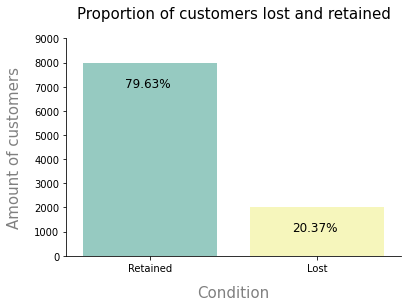

In [11]:

amount_retained = df[df['Exited'] == 0]['Exited'].count() / df.shape[0] * 100
amount_lost = df[df['Exited'] == 1]['Exited'].count() / df.shape[0] * 100

fig, ax = plt.subplots()
sns.countplot(x='Exited', palette="Set3", data=df)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()

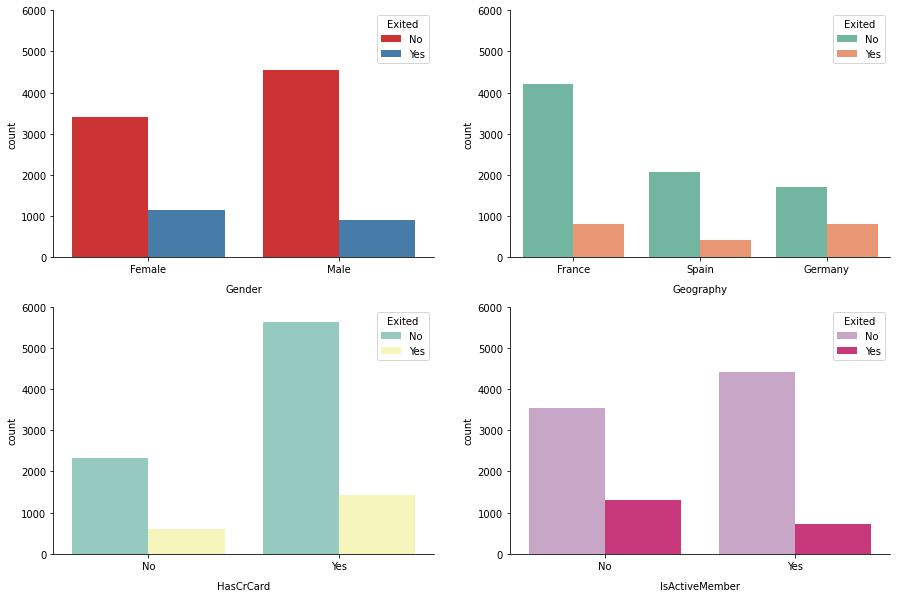

In [12]:
categorical_labels = [['Gender', 'Geography'], ['HasCrCard', 'IsActiveMember']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd']]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature, hue='Exited', palette=color, data=df, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
        ax1.set_ylim(0, 6000)
        ax1.legend(title='Exited', labels= ['No', 'Yes'])
        if i == 1:
            ax1.set_xticklabels(['No', 'Yes'])
sns.despine()

<AxesSubplot:>

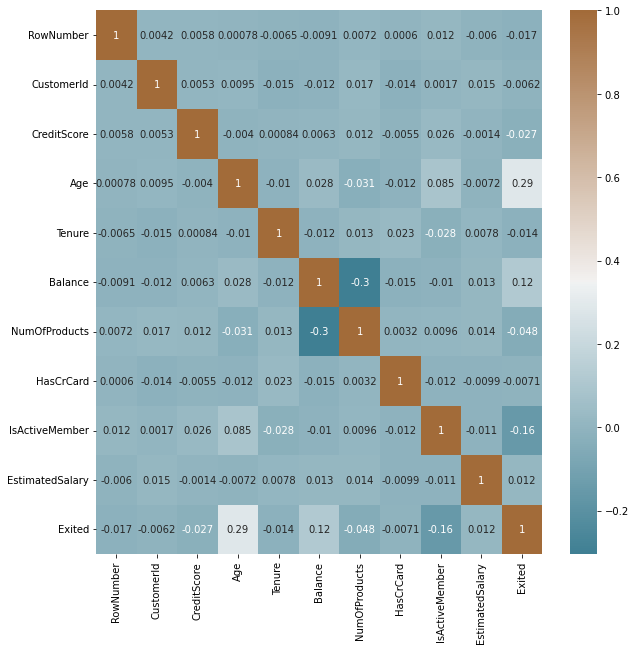

In [13]:
#correlation

corr = df.corr()# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 40, as_cmap=True))


In [14]:
features = ['Age','EstimatedSalary','Balance', 'IsActiveMember','NumOfProducts','Gender']
X = df
y = df['Exited']

# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [15]:
# All categorical columns, training and validation
cat_cols = [col for col in X.columns if X[col].dtype == "object"]

# All numeric columns
num_cols = list(set(X.columns)-set(cat_cols))
#num_cols.remove('Id')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [16]:
model = DecisionTreeClassifier()

In [17]:
KNN_model = KNeighborsClassifier()

In [18]:
# PIPELINE 1 Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)
prediction = my_pipeline.predict(X_valid)
print(accuracy_score(y_valid,prediction))
print(f1_score(y_valid,prediction))

1.0
1.0


In [19]:
# PIPELINE 2 Bundle preprocessing and modeling code in a pipeline
my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', KNN_model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)
prediction2 = my_pipeline.predict(X_valid)
print(accuracy_score(y_valid,prediction2))
print(f1_score(y_valid,prediction2))

1.0
1.0
